
Columns after cleaning:
 Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqftliving', 'sqftlot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqftabove',
       'sqftbasement', 'yrbuilt', 'yrrenovated', 'zipcode', 'lat', 'long',
       'sqftliving15', 'sqftlot15'],
      dtype='object')


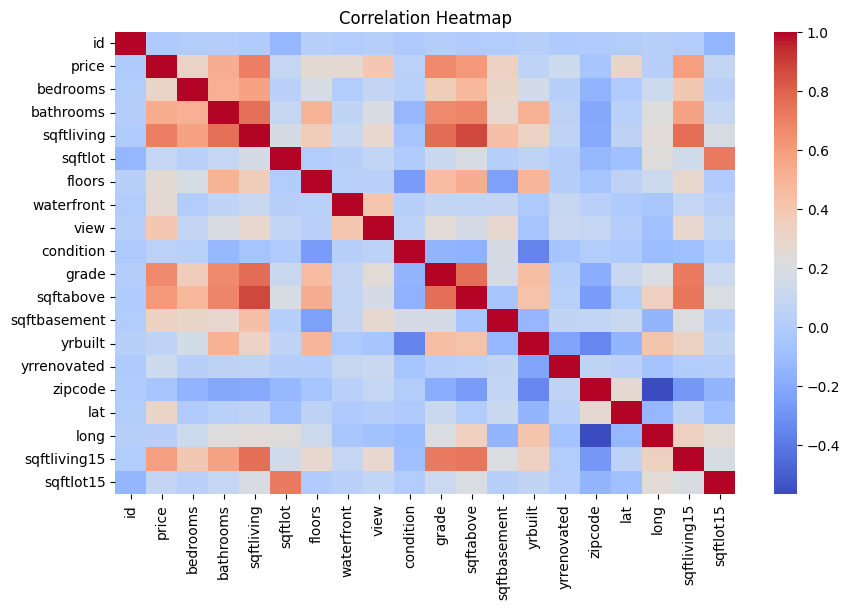


Linear Regression (Scratch)
MAE: 127479.03074136625
MSE: 45170807554.315865
R² : 0.7012052525817041

Linear Regression (Sklearn)
MAE: 127493.34208656367
MSE: 45173046132.7897
R² : 0.7011904448878442


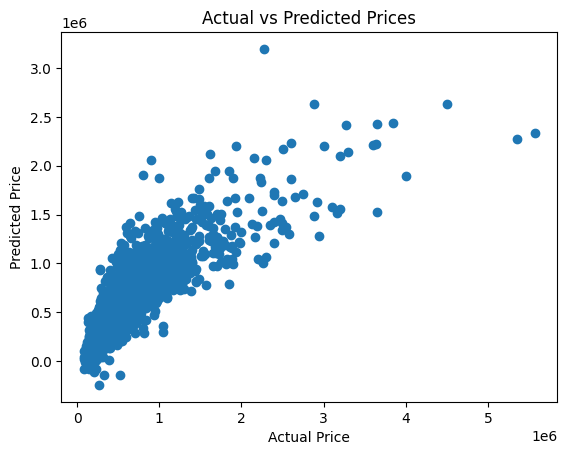


Polynomial Regression
MAE: 108777.33038783206
MSE: 34315417238.756275
R² : 0.7730112215930935

Decision Tree Regressor
MAE: 103488.61496645848
MSE: 42788771252.84681
R² : 0.7169618877532764

Random Forest Regressor
MAE: 72750.43819332364
MSE: 22076877993.514183
R² : 0.8539664101438819

Linear Regression Feature Impact:

         Feature    Coefficient
14           lat  595968.122144
5     waterfront  562413.070005
8          grade   94567.891697
6           view   53641.107022
1      bathrooms   44564.528881
7      condition   24526.710105
4         floors    7003.129520
2     sqftliving     109.015817
9      sqftabove      70.022741
10  sqftbasement      38.993076
16  sqftliving15      21.214331
12   yrrenovated      20.415633
3        sqftlot       0.088847
17     sqftlot15      -0.325832
13       zipcode    -552.253038
11       yrbuilt   -2680.768897
0       bedrooms  -34335.418739
15          long -194585.724048


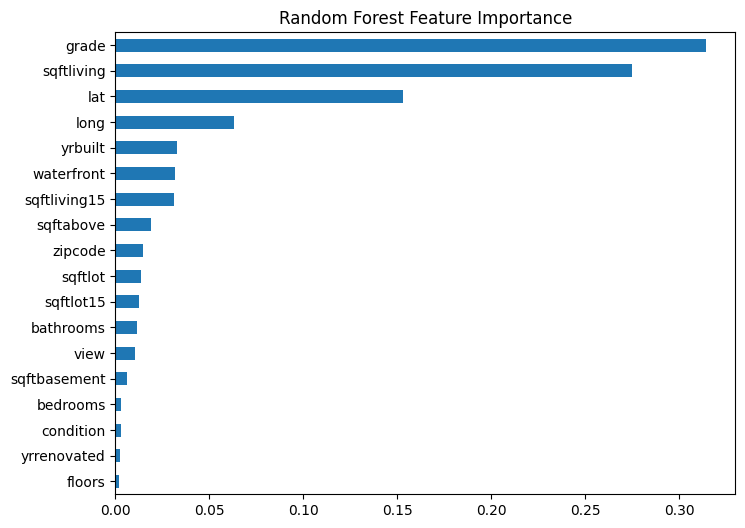


✅ HOUSE PRICE PREDICTION PROJECT COMPLETED SUCCESSFULLY


In [10]:
# =====================================================
# HOUSE PRICE PREDICTION - KING COUNTY DATASET
# =====================================================

# ----------------------
# 1. IMPORT LIBRARIES
# ----------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler # Import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------------
# 2. LOAD DATASET
# ----------------------
df = pd.read_csv("/content/house_data.csv")  # change file name if needed

# ----------------------
# 3. CLEAN COLUMN NAMES
# ----------------------
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "")
    .str.replace("_", "")
)

print("\nColumns after cleaning:\n", df.columns)

# ----------------------
# 4. TARGET & FEATURES
# ----------------------
target_col = "price"

# Drop rows where the target variable 'price' is NaN
df.dropna(subset=[target_col], inplace=True)

X = df.drop(columns=[target_col, "id", "date"], errors="ignore")
y = df[target_col]

# ----------------------
# 5. HANDLE MISSING VALUES
# ----------------------
for col in X.columns:
    X[col] = X[col].fillna(X[col].median())

# ----------------------
# 6. DATA VISUALIZATION
# ----------------------
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ----------------------
# 7. TRAIN TEST SPLIT
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------
# 8. LINEAR REGRESSION FROM SCRATCH
# ----------------------
class LinearRegressionScratch:
    def __init__(self, lr=0.01, epochs=2000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.W) + self.b
            dw = (1 / self.m) * np.dot(X.T, (y_pred - y))
            db = (1 / self.m) * np.sum(y_pred - y)
            self.W -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.W) + self.b

# Feature Scaling for the Scratch Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scratch_model = LinearRegressionScratch()
scratch_model.fit(X_train_scaled, y_train.values)
y_pred_scratch = scratch_model.predict(X_test_scaled)

# ----------------------
# 9. SCIKIT-LEARN LINEAR REGRESSION
# ----------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# ----------------------
# 10. EVALUATION FUNCTION
# ----------------------
def evaluate(y_true, y_pred, model_name):
    print(f"\n{model_name}")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R² :", r2_score(y_true, y_pred))

evaluate(y_test, y_pred_scratch, "Linear Regression (Scratch)")
evaluate(y_test, y_pred_lr, "Linear Regression (Sklearn)")

# Actual vs Predicted
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

# ----------------------
# 11. POLYNOMIAL REGRESSION
# ----------------------
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

poly_model = LinearRegression()
poly_model.fit(X_train_p, y_train_p)
y_pred_poly = poly_model.predict(X_test_p)

evaluate(y_test_p, y_pred_poly, "Polynomial Regression")

# ----------------------
# 12. DECISION TREE REGRESSOR
# ----------------------
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

evaluate(y_test, y_pred_dt, "Decision Tree Regressor")

# ----------------------
# 13. RANDOM FOREST REGRESSOR
# ----------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

evaluate(y_test, y_pred_rf, "Random Forest Regressor")

# ----------------------
# 14. FEATURE IMPORTANCE
# ----------------------
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr_model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nLinear Regression Feature Impact:\n")
print(coeff_df)

rf_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
rf_importance.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Random Forest Feature Importance")
plt.show()

print("\n✅ HOUSE PRICE PREDICTION PROJECT COMPLETED SUCCESSFULLY")